# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [56]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import scipy.stats as st

# Import the OpenWeatherMap API key
from api_keys_weather import api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [57]:
# Empty list for holding the latitude and longitude combinations
lats_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lats_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lats_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
cities

Number of cities in the list: 647


['calarasi',
 'ponta do sol',
 'punta arenas',
 'houma',
 'cockburn town',
 'chicama',
 'mirik',
 'longyearbyen',
 'port alfred',
 'ushuaia',
 'dong hoi',
 'jamestown',
 'atka',
 'jabiru',
 'qaanaaq',
 'grand junction',
 'wuwei',
 'resistencia',
 'busselton',
 'port elizabeth',
 'bonavista',
 'kodiak',
 'vardo',
 'sao filipe',
 'vaini',
 'bengkulu',
 'bluff',
 'upernavik',
 'noumea',
 'honningsvag',
 'georgetown',
 'cabo san lucas',
 'rikitea',
 'kysyl-syr',
 'port lincoln',
 'hithadhoo',
 'new norfolk',
 'saint george',
 'hobart',
 'kedrovyy',
 'holoby',
 'attawapiskat',
 'riyadh',
 'chokurdakh',
 'hilo',
 'atuona',
 'hermanus',
 'klaksvik',
 'butaritari',
 'jerico',
 'vaitupu',
 'kostomuksha',
 'cape town',
 'barentsburg',
 'nagapattinam',
 'meadow lake',
 'sinkat',
 'arraial do cabo',
 'portland',
 'cherskiy',
 'castro',
 'kapaa',
 'goderich',
 'mbandaka',
 'mar del plata',
 'anchorage',
 'souillac',
 'mosquera',
 'albany',
 'tuatapere',
 'svetlogorsk',
 'mys shmidta',
 'severnyy',


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [58]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print(f"Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | calarasi
Processing Record 2 of Set 1 | ponta do sol
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | houma
Processing Record 5 of Set 1 | cockburn town
Processing Record 6 of Set 1 | chicama
Processing Record 7 of Set 1 | mirik
Processing Record 8 of Set 1 | longyearbyen
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | dong hoi
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | atka
City not found. Skipping...
Processing Record 14 of Set 1 | jabiru
City not found. Skipping...
Processing Record 15 of Set 1 | qaanaaq
Processing Record 16 of Set 1 | grand junction
Processing Record 17 of Set 1 | wuwei
Processing Record 18 of Set 1 | resistencia
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | port elizabeth
Processing Record 21 of Set 1 | bonavista
Processing R

Processing Record 36 of Set 4 | malwan
City not found. Skipping...
Processing Record 37 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 38 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 39 of Set 4 | paita
Processing Record 40 of Set 4 | kidal
Processing Record 41 of Set 4 | sarangani
Processing Record 42 of Set 4 | barawe
City not found. Skipping...
Processing Record 43 of Set 4 | quang ngai
Processing Record 44 of Set 4 | aden
Processing Record 45 of Set 4 | ailigandi
Processing Record 46 of Set 4 | sokolo
Processing Record 47 of Set 4 | chapais
Processing Record 48 of Set 4 | namibe
Processing Record 49 of Set 4 | la victoria
Processing Record 0 of Set 5 | bryant
Processing Record 1 of Set 5 | saint-augustin
Processing Record 2 of Set 5 | matara
Processing Record 3 of Set 5 | mikuni
Processing Record 4 of Set 5 | north myrtle beach
Processing Record 5 of Set 5 | annau
Processing Record 6 of Set 5 | dikson
Processing Record 7 of Set 5 | rio fr

Processing Record 25 of Set 8 | asau
Processing Record 26 of Set 8 | nisia floresta
Processing Record 27 of Set 8 | alice
Processing Record 28 of Set 8 | sinnamary
Processing Record 29 of Set 8 | talaya
Processing Record 30 of Set 8 | ibipeba
Processing Record 31 of Set 8 | honiara
Processing Record 32 of Set 8 | quatre cocos
Processing Record 33 of Set 8 | rivadavia
Processing Record 34 of Set 8 | timiryazevskoye
Processing Record 35 of Set 8 | bat khela
Processing Record 36 of Set 8 | verkhoyansk
Processing Record 37 of Set 8 | vallenar
Processing Record 38 of Set 8 | prince rupert
Processing Record 39 of Set 8 | pringsewu
Processing Record 40 of Set 8 | bad liebenwerda
Processing Record 41 of Set 8 | the valley
Processing Record 42 of Set 8 | puqi
Processing Record 43 of Set 8 | centralia
Processing Record 44 of Set 8 | bambanglipuro
Processing Record 45 of Set 8 | amapa
Processing Record 46 of Set 8 | saskylakh
Processing Record 47 of Set 8 | kokopo
Processing Record 48 of Set 8 | 

Processing Record 11 of Set 12 | araouane
Processing Record 12 of Set 12 | porkhov
Processing Record 13 of Set 12 | kahului
Processing Record 14 of Set 12 | camacha
Processing Record 15 of Set 12 | cidreira
Processing Record 16 of Set 12 | yerbogachen
Processing Record 17 of Set 12 | mogadishu
Processing Record 18 of Set 12 | diu
Processing Record 19 of Set 12 | emerald
Processing Record 20 of Set 12 | broome
Processing Record 21 of Set 12 | gulshat
City not found. Skipping...
Processing Record 22 of Set 12 | benghazi
Processing Record 23 of Set 12 | kaohsiung
Processing Record 24 of Set 12 | kollam
Processing Record 25 of Set 12 | porto velho
Processing Record 26 of Set 12 | halifax
Processing Record 27 of Set 12 | umm kaddadah
Processing Record 28 of Set 12 | spornoye
Processing Record 29 of Set 12 | mrirt
City not found. Skipping...
Processing Record 30 of Set 12 | natal
Processing Record 31 of Set 12 | talnakh
Processing Record 32 of Set 12 | strezhevoy
Processing Record 33 of Set 

In [59]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          590
Lat           590
Lng           590
Max Temp      590
Humidity      590
Cloudiness    590
Wind Speed    590
Country       590
Date          590
dtype: int64

In [60]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,calarasi,47.2544,28.3081,272.21,71,100,1.07,MD,1669872367
1,ponta do sol,32.6667,-17.1000,292.50,78,60,3.24,PT,1669872368
2,punta arenas,-53.1500,-70.9167,282.21,61,20,14.40,CL,1669872361
3,houma,29.5958,-90.7195,284.82,66,0,5.14,US,1669872308
4,cockburn town,21.4612,-71.1419,300.01,71,79,9.41,TC,1669872369


In [61]:
# Export the City_Data into a csv
city_data_df.to_csv("Output_Data/cities.csv", index_label="City_ID")

In [62]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,calarasi,47.2544,28.3081,272.21,71,100,1.07,MD,1669872367
1,ponta do sol,32.6667,-17.1000,292.50,78,60,3.24,PT,1669872368
2,punta arenas,-53.1500,-70.9167,282.21,61,20,14.40,CL,1669872361
3,houma,29.5958,-90.7195,284.82,66,0,5.14,US,1669872308
4,cockburn town,21.4612,-71.1419,300.01,71,79,9.41,TC,1669872369


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

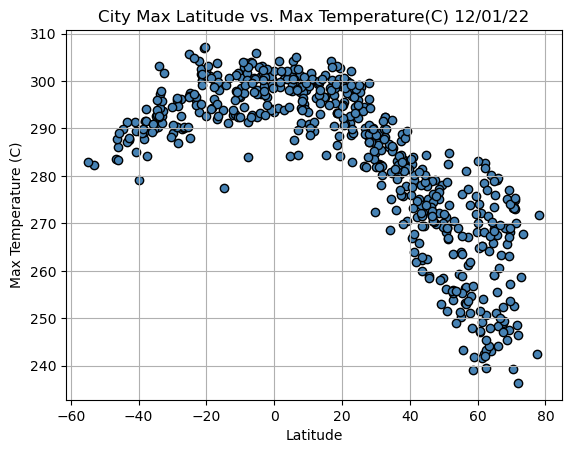

In [63]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker='o', color='steelblue', edgecolor='black')

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Max Temperature(C) "+ time.strftime("%x"))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

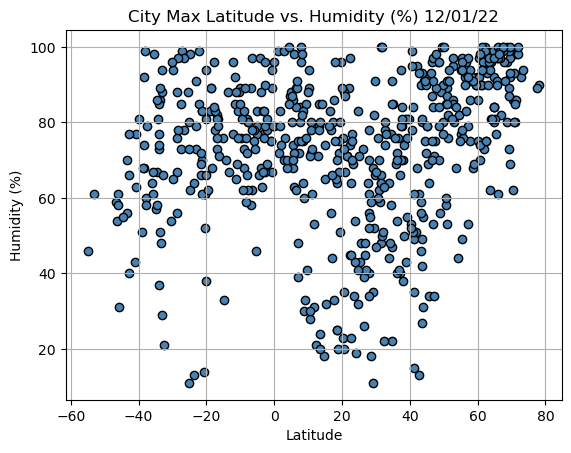

In [64]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker='o', color='steelblue', edgecolor='black')

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Humidity (%) "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

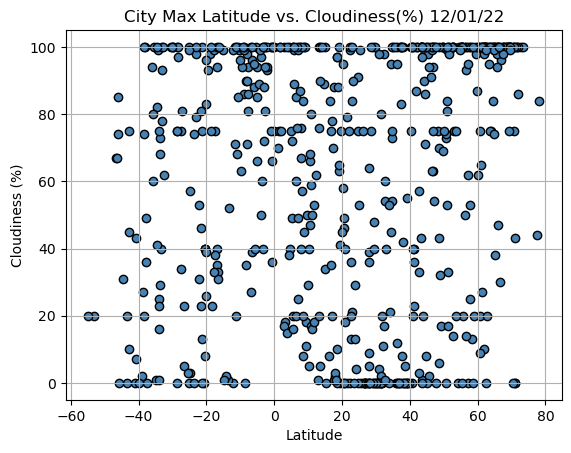

In [65]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker='o', color='steelblue', edgecolor='black')

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Cloudiness(%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

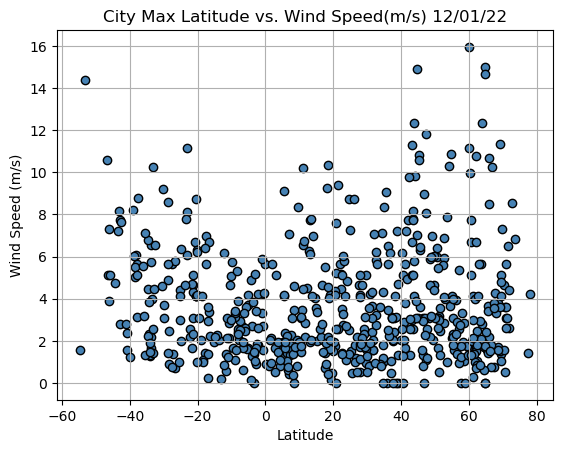

In [66]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker='o', color='steelblue', edgecolor='black')

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Wind Speed(m/s) "+ time.strftime("%x"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [67]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,calarasi,47.2544,28.3081,272.21,71,100,1.07,MD,1669872367
1,ponta do sol,32.6667,-17.1000,292.50,78,60,3.24,PT,1669872368
3,houma,29.5958,-90.7195,284.82,66,0,5.14,US,1669872308
4,cockburn town,21.4612,-71.1419,300.01,71,79,9.41,TC,1669872369
6,mirik,26.8945,88.1848,290.10,45,0,2.18,IN,1669872369


In [68]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <= 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,punta arenas,-53.1500,-70.9167,282.21,61,20,14.40,CL,1669872361
5,chicama,-7.8447,-79.1469,291.45,80,94,2.02,PE,1669872369
8,port alfred,-33.5906,26.8910,293.81,86,73,1.65,ZA,1669872370
9,ushuaia,-54.8000,-68.3000,282.96,46,20,1.54,AR,1669872371
15,resistencia,-27.4606,-58.9839,296.18,73,75,5.66,AR,1669872373


###  Temperature vs. Latitude Linear Regression Plot

The correlation between latitude and max temperature (r-value) is: -0.85
The the regression equation for latitude and max temperature is: y=-0.69x+305.3


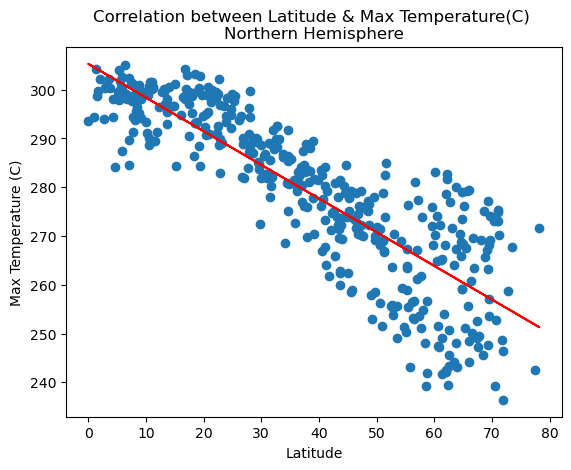

In [105]:
# Linear regression on Northern Hemisphere

# Perform a linear regression on latitude versus max temperature
(slope,intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))

# Caculate correlation coefficient
correlation = round(st.pearsonr(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])[0],2)
print(f"The correlation between latitude and max temperature (r-value) is: {correlation}")
print(f"The the regression equation for latitude and max temperature is: {line_eq}")


# plt.plot(x_values, y_values)
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

plt.title("Correlation between Latitude & Max Temperature(C) \nNorthern Hemisphere")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")

plt.plot(northern_hemi_df["Lat"],regress_values,"r-", label='y={:.2f}x+{:.2f}'.format(slope,intercept))

plt.savefig("output_data/Fig5.png")
plt.show()

The correlation between latitude and max temperature (r-value) is: 0.6
The the regression equation for latitude and max temperature is: y=0.26x+300.97


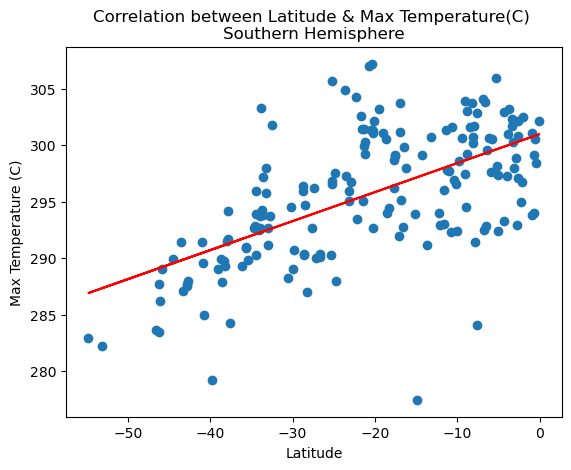

In [112]:
# Linear regression on Southern Hemisphere

# Perform a linear regression on latitude versus max temperature
(slope,intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))

# Caculate correlation coefficient
correlation = round(st.pearsonr(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])[0],2)
print(f"The correlation between latitude and max temperature (r-value) is: {correlation}")
print(f"The the regression equation for latitude and max temperature is: {line_eq}")


# plt.plot(x_values, y_values)
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

plt.title("Correlation between Latitude & Max Temperature(C) \nSouthern Hemisphere")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")

plt.plot(southern_hemi_df["Lat"],regress_values,"r-", label='y={:.2f}x+{:.2f}'.format(slope,intercept))

plt.savefig("output_data/Fig6.png")
plt.show()

### Humidity vs. Latitude Linear Regression Plot

The correlation between latitude and humidity (r-value) is: 0.37
The the regression equation for latitude and humidity is: y=0.38x+58.62


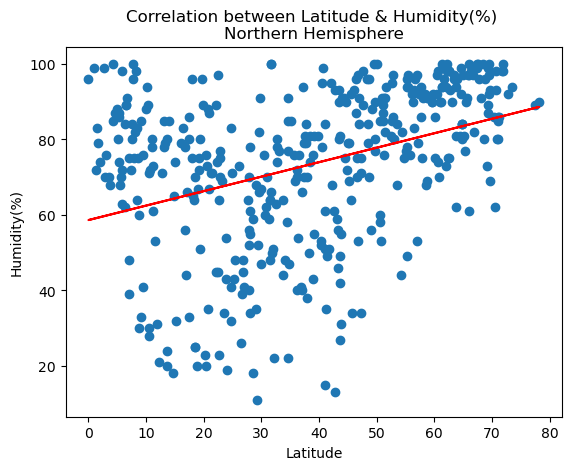

In [111]:
# Northern Hemisphere

# Perform a linear regression on latitude versus max temperature
(slope,intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))

# Caculate correlation coefficient
correlation = round(st.pearsonr(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])[0],2)
print(f"The correlation between latitude and humidity (r-value) is: {correlation}")
print(f"The the regression equation for latitude and humidity is: {line_eq}")


# plt.plot(x_values, y_values)
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

plt.title("Correlation between Latitude & Humidity(%) \nNorthern Hemisphere")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")

plt.plot(northern_hemi_df["Lat"],regress_values,"r-", label='y={:.2f}x+{:.2f}'.format(slope,intercept))

plt.savefig("output_data/Fig7.png")
plt.show()

The correlation between latitude and humidity (r-value) is: 0.28
The the regression equation for latitude and humidity is: y=0.35x+79.94


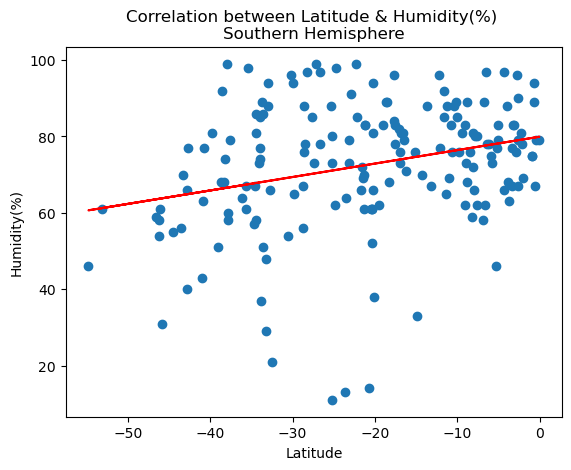

In [113]:
# Southern Hemisphere

# Perform a linear regression on latitude versus max temperature
(slope,intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))

# Caculate correlation coefficient
correlation = round(st.pearsonr(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])[0],2)
print(f"The correlation between latitude and humidity (r-value) is: {correlation}")
print(f"The the regression equation for latitude and humidity is: {line_eq}")


# plt.plot(x_values, y_values)
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

plt.title("Correlation between Latitude & Humidity(%) \nSouthern Hemisphere")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")

plt.plot(southern_hemi_df["Lat"],regress_values,"r-", label='y={:.2f}x+{:.2f}'.format(slope,intercept))

plt.savefig("output_data/Fig8.png")
plt.show()

### Cloudiness vs. Latitude Linear Regression Plot

The correlation between latitude and cloudiness (r-value) is: 0.27
The the regression equation for latitude and cloudiness is: y=0.51x+41.04


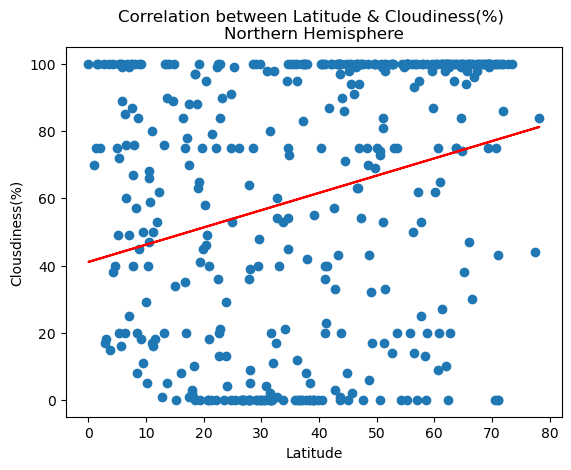

In [114]:
# Northern Hemisphere

# Perform a linear regression on latitude versus max temperature
(slope,intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))

# Caculate correlation coefficient
correlation = round(st.pearsonr(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])[0],2)
print(f"The correlation between latitude and cloudiness (r-value) is: {correlation}")
print(f"The the regression equation for latitude and cloudiness is: {line_eq}")


# plt.plot(x_values, y_values)
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

plt.title("Correlation between Latitude & Cloudiness(%) \nNorthern Hemisphere")
plt.ylabel("Clousdiness(%)")
plt.xlabel("Latitude")

plt.plot(northern_hemi_df["Lat"],regress_values,"r-", label='y={:.2f}x+{:.2f}'.format(slope,intercept))

plt.savefig("output_data/Fig9.png")
plt.show()

The correlation between latitude and cloudiness (r-value) is: 0.35
The the regression equation for latitude and cloudiness is: y=0.91x+82.07


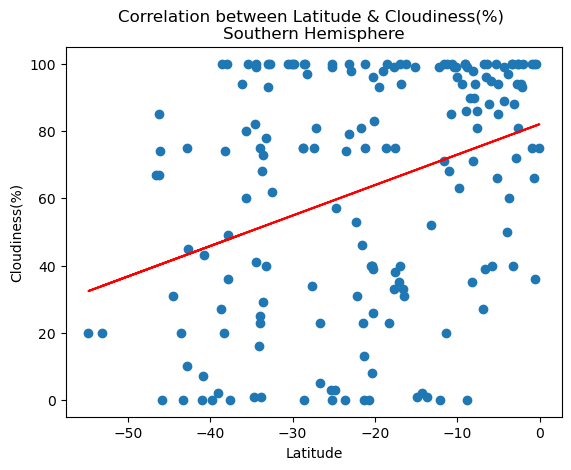

In [115]:
# Southern Hemisphere

# Perform a linear regression on latitude versus max temperature
(slope,intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))

# Caculate correlation coefficient
correlation = round(st.pearsonr(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])[0],2)
print(f"The correlation between latitude and cloudiness (r-value) is: {correlation}")
print(f"The the regression equation for latitude and cloudiness is: {line_eq}")


# plt.plot(x_values, y_values)
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

plt.title("Correlation between Latitude & Cloudiness(%) \nSouthern Hemisphere")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")

plt.plot(southern_hemi_df["Lat"],regress_values,"r-", label='y={:.2f}x+{:.2f}'.format(slope,intercept))

plt.savefig("output_data/Fig10.png")
plt.show()

### Wind Speed vs. Latitude Linear Regression Plot

The correlation between latitude and wind speed (r-value) is: 0.15
The the regression equation for latitude and wind speed is: y=0.02x+2.8


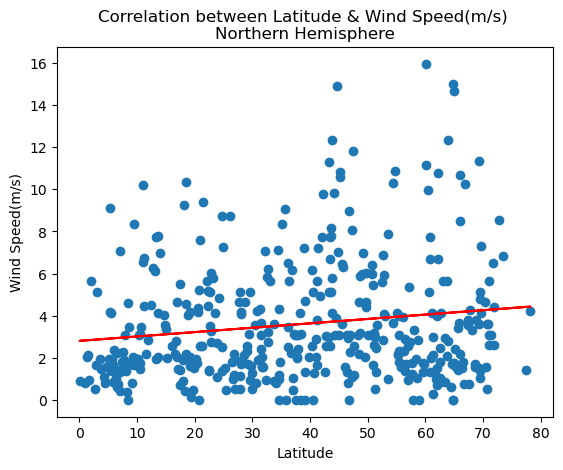

In [116]:
# Northern Hemisphere

# Perform a linear regression on latitude versus max temperature
(slope,intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))

# Caculate correlation coefficient
correlation = round(st.pearsonr(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])[0],2)
print(f"The correlation between latitude and wind speed (r-value) is: {correlation}")
print(f"The the regression equation for latitude and wind speed is: {line_eq}")


# plt.plot(x_values, y_values)
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

plt.title("Correlation between Latitude & Wind Speed(m/s) \nNorthern Hemisphere")
plt.ylabel("Wind Speed(m/s)")
plt.xlabel("Latitude")

plt.plot(northern_hemi_df["Lat"],regress_values,"r-", label='y={:.2f}x+{:.2f}'.format(slope,intercept))

plt.savefig("output_data/Fig11.png")
plt.show()

The correlation between latitude and wind speed (r-value) is: -0.39
The the regression equation for latitude and wind speed is: y=-0.07x+2.3


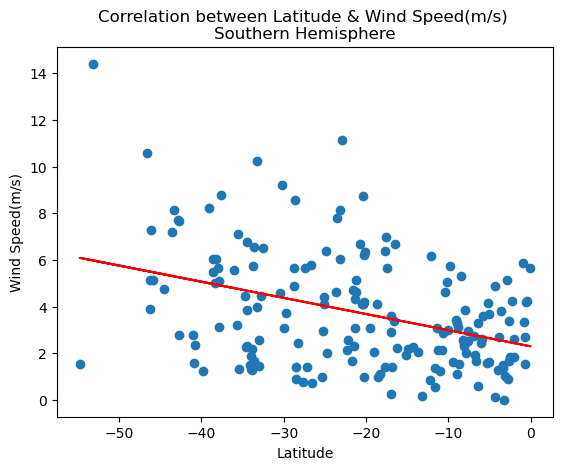

In [117]:
# Southern Hemisphere
# Perform a linear regression on latitude versus max temperature
(slope,intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))

# Caculate correlation coefficient
correlation = round(st.pearsonr(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])[0],2)
print(f"The correlation between latitude and wind speed (r-value) is: {correlation}")
print(f"The the regression equation for latitude and wind speed is: {line_eq}")


# plt.plot(x_values, y_values)
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

plt.title("Correlation between Latitude & Wind Speed(m/s) \nSouthern Hemisphere")
plt.ylabel("Wind Speed(m/s)")
plt.xlabel("Latitude")

plt.plot(southern_hemi_df["Lat"],regress_values,"r-", label='y={:.2f}x+{:.2f}'.format(slope,intercept))

plt.savefig("output_data/Fig12.png")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE